In [2]:
import numpy as np
import pandas as pd 

from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
df  = pd.DataFrame(digits.data )
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [15]:
digits.target[3]

3

In [16]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

3


<Figure size 432x288 with 0 Axes>

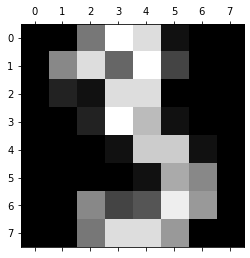

In [19]:
import matplotlib.pyplot as plt

plt.gray()
print(digits.target[3])
plt.matshow(digits.images[3])

# Hyper Param Turing

In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.linear_model import LogisticRegression as lr
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.naive_bayes import MultinomialNB as mnb
from sklearn.tree import DecisionTreeClassifier as dtc

In [35]:
model_Paremeters = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },    
    'random_forest': {
        'model': rfc(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },       
    'logistic_regression' : {
        'model': lr(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Gaussian_NB' : {
        'model' : gnb(),
        'params' : {}
    },
    'Multinomial_NB' : {
        'model' : mnb(),
        'params' : {}
        
        },
    'Decision_Tree_classifier' :{
        'model' : dtc(),
        'params' : {
            'criterion': ['gini','entropy']
        }
    }
}



In [27]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import time
t1 = time.time()

scores = []

for mod , mp in model_Paremeters.items():
    clf = GridSearchCV(mp['model'] , mp['params'] , cv =100  , return_train_score=False)
    clf.fit(digits.data , digits.target)
    
    scores.append({
        'Model' : mod,
        'Best_Score' : clf.best_score_,
        'Best_Parameters' : clf.best_params_
    })

In [ ]:
df = pd.DataFrame(scores , columns=['Model' , 'Best_Score' , 'Best_Parameters'])
df

In [ ]:
t2 = time.time()
print(f"Total time taken is : {t2-t1} seconds")